In [2]:
import pandas as pd


df = pd.read_csv('data.csv')
df.head()

,messages,sentiment
0,I'm so happy to be finally done with exams!,1
1,This is the worst day ever. Everything went wr...,0
2,The food was amazing! I highly recommend this ...,1
3,I'm feeling so frustrated with this project. I...,0
4,Just got a promotion! So excited for this new ...,1


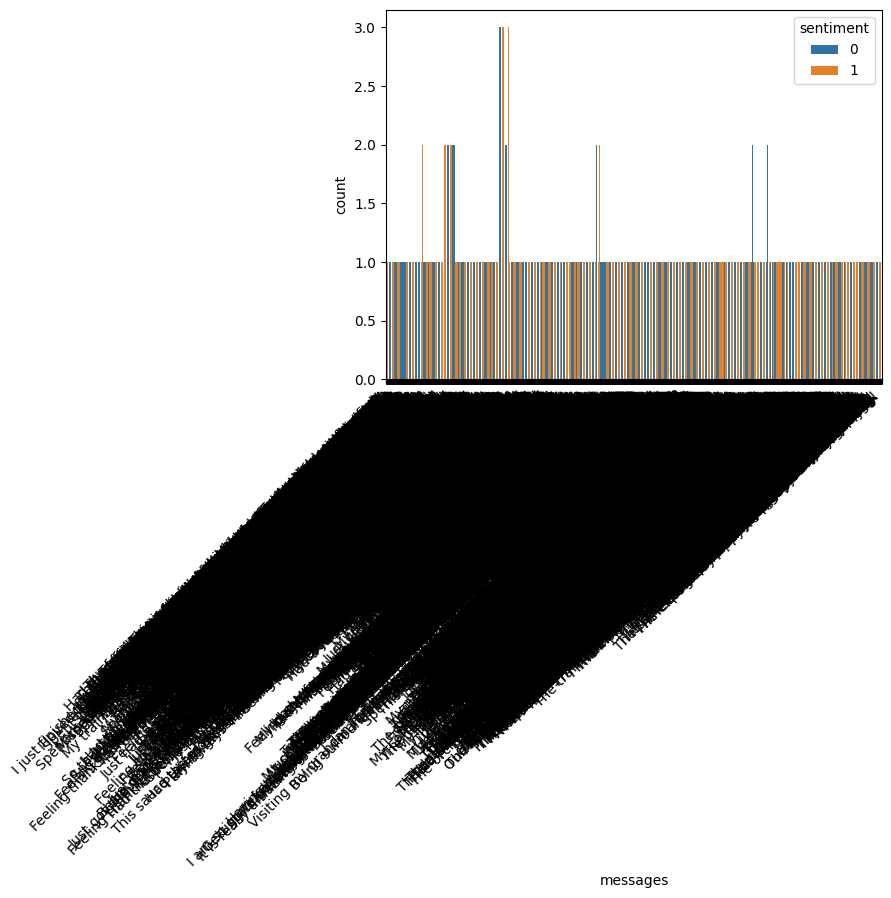

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='messages',hue='sentiment')
plt.xticks(rotation=45, ha='right');

In [4]:
pre_df = pd.get_dummies(df,columns=['messages'],drop_first=True)
pre_df.head()

,sentiment,messages_A power outage during the storm ruined all our dinner preparations.,messages_A power outage ruined our carefully planned dinner party.,messages_A stranger's random act of kindness completely turned my day around!,messages_A surprise visit from my sister completely made my month!,messages_A tree fell over and now I'm trapped in my house,messages_Absolutely loving this new song! It's stuck in my head.,"messages_All the foods tasted plain, I wish they had more flavor!",messages_All the tires on my car just popped on the way to the wedding,messages_An unexpected major car repair completely depleted my savings.,...,messages_What a joy it is to make music,messages_What a joy it is to see my dog wag its tail and get happy,messages_What a rush it was getting to go on the rollercoaster today!,messages_What a tragedy to hear that my teacher has cancer,messages_What a wonderful and memorable day.,messages_What a wonderful surprise!,"messages_Wish the bus system ran more often, missing it really sucks","messages_Woke up late and missed my bus, what a terrible start to the day.",messages_You are amazing,messages_You suck at your job
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('sentiment', axis=1)
y = pre_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [8]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5393548387096774
F1 Score: 0.655638786190621


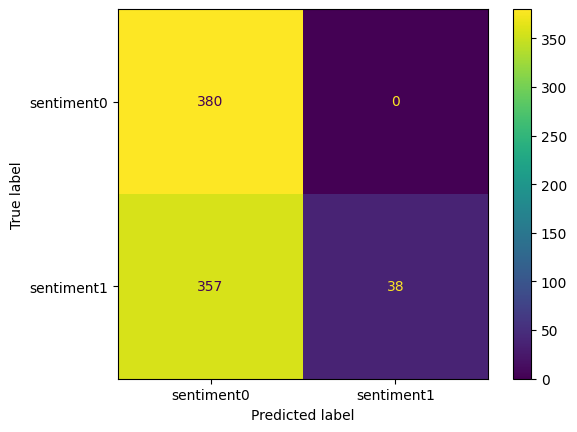

In [9]:
labels = ["sentiment0", "sentiment1"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();